# Config

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

# Utils

In [2]:
def barplot(kind, all, regular, foreigner, administrative):
  fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

  if kind == 'survey_time':
    number_ranges = [0, 20, 30, 40, 60, 9999999]
    number_labels = ['10-20 min', '20-30 min', '30-40 min', '40-60 min', '> 60 min']
  elif kind == 'sessions':
    number_ranges = [0, 1, 2, 3, 9999999]
    number_labels = ['1', '2', '3', '> 3']

  # pd.cut(all, bins=number_ranges).value_counts().sort_index().plot(kind='bar', ax=axs[0])
  pd.cut(regular, bins=number_ranges).value_counts().sort_index().plot(kind='bar', ax=axs[0])
  pd.cut(foreigner, bins=number_ranges).value_counts().sort_index().plot(kind='bar', ax=axs[1])
  pd.cut(administrative, bins=number_ranges).value_counts().sort_index().plot(kind='bar', ax=axs[2])

  # axs[0].set_title('ALL')
  axs[0].set_title('Cittadini')
  axs[1].set_title('Non madrelingua')
  axs[2].set_title('Amministrativi')

  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(number_labels)
    for container in ax.containers:
      ax.bar_label(container)

  plt.show()


def dual_barplot(kind, all, regular, foreigner, administrative):
  fig, axs = plt.subplots(2, 4, sharey=True, figsize=(12, 6))

  if kind == 'reading_time':
    number_ranges = [0, 2, 3, 4, 5, 10, 15, 30, 9999999]
    number_labels = ['<2 min', '2-3 min', '3-4 min', '4-5 min', '5-10 min', '10-15 min', '15-30 min', '> 30 min']
  elif kind == 'rate':
    number_ranges = [0, 1, 2, 3, 4, 9999999]
    number_labels = ['1', '2', '3', '4', '5']
  elif kind == 'correctness':
    number_ranges = [-9999999, 0, 1, 2, 3, 4, 5, 6]
    number_labels = ['0', '1', '2', '3', '4', '5', '6']
  elif kind == 'insecurity':
    number_ranges = [-9999999, 0, 1, 2, 3, 9999999]
    number_labels = ['0', '1', '2', '3', '4']

  pd.concat([
      pd.cut(all['d1o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(all['d1s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0, 0])
  pd.concat([
      pd.cut(all['d2o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(all['d2s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1, 0])

  pd.concat([
      pd.cut(regular['d1o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(regular['d1s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0, 1])
  pd.concat([
      pd.cut(regular['d2o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(regular['d2s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1, 1])

  pd.concat([
      pd.cut(foreigner['d1o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(foreigner['d1s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0, 2])
  pd.concat([
      pd.cut(foreigner['d2o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(foreigner['d2s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1, 2])

  pd.concat([
      pd.cut(administrative['d1o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(administrative['d1s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0, 3])
  pd.concat([
      pd.cut(administrative['d2o'], bins=number_ranges).value_counts().sort_index().rename('original'),
      pd.cut(administrative['d2s'], bins=number_ranges).value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1, 3])

  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(number_labels)
    for container in ax.containers:
      ax.bar_label(container)

  axs[0, 0].set_ylabel('D1')
  axs[1, 0].set_ylabel('D2')

  axs[0, 0].set_title('ALL')
  axs[0, 1].set_title('REGULAR')
  axs[0, 2].set_title('FOREIGNER')
  axs[0, 3].set_title('ADMINISTRATIVE')

  plt.show()


def questions_barplot(all, regular, foreigner, administrative):
  fig = plt.figure(constrained_layout=True, figsize=(12, 8))
  subfigs = fig.subfigures(nrows=4, ncols=1)

  subfigs[0].suptitle('ALL')
  subfigs[1].suptitle('REGULAR')
  subfigs[2].suptitle('FOREIGNER')
  subfigs[3].suptitle('ADMINISTRATIVE')

  # ALL
  axs = subfigs[0].subplots(1, 6, sharey=True)
  pd.concat([
      all['q1_o'].value_counts().sort_index().rename('original'),
      all['q1_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0], title='q1')
  pd.concat([
      all['q2_o'].value_counts().sort_index().rename('original'),
      all['q2_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1], title='q2')
  pd.concat([
      all['q3_o'].value_counts().sort_index().rename('original'),
      all['q3_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[2], title='q3')
  pd.concat([
      all['q4_o'].value_counts().sort_index().rename('original'),
      all['q4_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[3], title='q4')
  pd.concat([
      all['q5_o'].value_counts().sort_index().rename('original'),
      all['q5_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[4], title='q5')
  pd.concat([
      all['q6_o'].value_counts().sort_index().rename('original'),
      all['q6_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[5], title='q6')
  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for container in ax.containers:
      ax.bar_label(container)

  # REGULAR
  axs = subfigs[1].subplots(1, 6, sharey=True)
  pd.concat([
      regular['q1_o'].value_counts().sort_index().rename('original'),
      regular['q1_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0], title='q1')
  pd.concat([
      regular['q2_o'].value_counts().sort_index().rename('original'),
      regular['q2_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1], title='q2')
  pd.concat([
      regular['q3_o'].value_counts().sort_index().rename('original'),
      regular['q3_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[2], title='q3')
  pd.concat([
      regular['q4_o'].value_counts().sort_index().rename('original'),
      regular['q4_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[3], title='q4')
  pd.concat([
      regular['q5_o'].value_counts().sort_index().rename('original'),
      regular['q5_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[4], title='q5')
  pd.concat([
      regular['q6_o'].value_counts().sort_index().rename('original'),
      regular['q6_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[5], title='q6')
  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for container in ax.containers:
      ax.bar_label(container)

  # FOREIGNER
  axs = subfigs[2].subplots(1, 6, sharey=True)
  pd.concat([
      foreigner['q1_o'].value_counts().sort_index().rename('original'),
      foreigner['q1_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0], title='q1')
  pd.concat([
      foreigner['q2_o'].value_counts().sort_index().rename('original'),
      foreigner['q2_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1], title='q2')
  pd.concat([
      foreigner['q3_o'].value_counts().sort_index().rename('original'),
      foreigner['q3_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[2], title='q3')
  pd.concat([
      foreigner['q4_o'].value_counts().sort_index().rename('original'),
      foreigner['q4_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[3], title='q4')
  pd.concat([
      foreigner['q5_o'].value_counts().sort_index().rename('original'),
      foreigner['q5_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[4], title='q5')
  pd.concat([
      foreigner['q6_o'].value_counts().sort_index().rename('original'),
      foreigner['q6_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[5], title='q6')
  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for container in ax.containers:
      ax.bar_label(container)

  # ADMINISTRATIVE
  axs = subfigs[3].subplots(1, 6, sharey=True)
  pd.concat([
      administrative['q1_o'].value_counts().sort_index().rename('original'),
      administrative['q1_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[0], title='q1')
  pd.concat([
      administrative['q2_o'].value_counts().sort_index().rename('original'),
      administrative['q2_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[1], title='q2')
  pd.concat([
      administrative['q3_o'].value_counts().sort_index().rename('original'),
      administrative['q3_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[2], title='q3')
  pd.concat([
      administrative['q4_o'].value_counts().sort_index().rename('original'),
      administrative['q4_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[3], title='q4')
  pd.concat([
      administrative['q5_o'].value_counts().sort_index().rename('original'),
      administrative['q5_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[4], title='q5')
  pd.concat([
      administrative['q6_o'].value_counts().sort_index().rename('original'),
      administrative['q6_s'].value_counts().sort_index().rename('simplified')
  ], axis=1).plot(kind='bar', ax=axs[5], title='q6')
  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for container in ax.containers:
      ax.bar_label(container)

  plt.show()

In [3]:
def boxplot(all, regular, foreigner, administrative):
  fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4), tight_layout=True)

  # all.plot(kind='box', ax=axs[0])
  regular.plot(kind='box', ax=axs[0])
  foreigner.plot(kind='box', ax=axs[1])
  administrative.plot(kind='box', ax=axs[2])

  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

  # axs[0].set_title('ALL')
  axs[0].set_title('Cittadini')
  axs[1].set_title('Non madrelingua')
  axs[2].set_title('Amministrativi')

  plt.show()


def dual_boxplot(all, regular, foreigner, administrative):
  fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

  # pd.concat([all['d1o'].rename('original'), all['d1s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[0, 0])
  pd.concat([regular['d1o'].rename('original'), regular['d1s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[0])
  pd.concat([foreigner['d1o'].rename('original'), foreigner['d1s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[1])
  pd.concat([administrative['d1o'].rename('original'), administrative['d1s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[2])


  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

  # axs[0, 0].set_ylabel('D1')
  # axs[1, 0].set_ylabel('D2')

  # axs[0, 0].set_title('ALL')
  axs[0].set_title('Cittadini')
  axs[1].set_title('Non madrelingua')
  axs[2].set_title('Amministrativi')

  plt.show()

  fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

  # pd.concat([all['d2o'].rename('original'), all['d2s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[0])
  pd.concat([regular['d2o'].rename('original'), regular['d2s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[0])
  pd.concat([foreigner['d2o'].rename('original'), foreigner['d2s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[1])
  pd.concat([administrative['d2o'].rename('original'), administrative['d2s'].rename('simplified')], axis=1).plot(kind='box', ax=axs[2])

  for ax in axs.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

  # axs[0, 0].set_ylabel('D1')
  # axs[1, 0].set_ylabel('D2')

  # axs[0, 0].set_title('ALL')
  axs[0].set_title('Cittadini')
  axs[1].set_title('Non madrelingua')
  axs[2].set_title('Amministrativi')

  plt.show()

# Load data

In [4]:
data_df = pd.read_csv(f'./final_data/filtered_participants.csv')
data_df.head()

,id,participant_type,participant_group,duration,sessions,d1_reading_time,d1_q1,d1_q2,d1_q3,d1_q4,...,d2_rate,d2_correctness,d2_insecurity,d2_insecurity_count,age_range,education_fields,education_level,employment,employment_fields,italian_knowledge
0,1,ADMINISTRATIVE,A,1020,1,499.972,1.0,3.0,1.0,1.0,...,2.0,5,False,0,25-34,JURIDICAL,BACHELOR,EMPLOYEE,ADMINISTRATIVE,M
1,10,ADMINISTRATIVE,B,985,1,383.870,1.0,3.0,3.0,1.0,...,3.0,3,False,0,35-44,OTHER,HIGH,EMPLOYEE,IT | OTHER,M
2,11,ADMINISTRATIVE,A,878,1,309.125,1.0,3.0,3.0,1.0,...,3.0,5,False,0,45-54,JURIDICAL,MASTER,EMPLOYEE,ADMINISTRATIVE,M
3,13,ADMINISTRATIVE,C,1016,1,416.598,1.0,3.0,1.0,1.0,...,3.0,5,False,0,45-54,OTHER,HIGH,EMPLOYEE,ADMINISTRATIVE,M
4,14,ADMINISTRATIVE,B,1138,1,323.449,1.0,3.0,2.0,1.0,...,3.0,3,False,0,55-64,JURIDICAL,MASTER,EMPLOYEE,ADMINISTRATIVE,M


In [5]:
data_df['participant_type'].value_counts()

participant_type
REGULAR           41
FOREIGNER         29
ADMINISTRATIVE    15
Name: count, dtype: int64

# Survey time

In [6]:
def survey_time(_n, _p):
  return {
      'name': _n,
      'duration_mean': _p['duration'].mean() / 60.0,
      'duration_median': _p['duration'].median() / 60.0,
  }, {
      'name': _n,
      'duration': _p['duration'] / 60.0,
  }

In [7]:
pd.DataFrame([
  survey_time('ALL', data_df)[0],
  survey_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  survey_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  survey_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,duration_mean,duration_median
0,ALL,27.880000,22.650000
1,REGULAR,29.533333,20.100000
2,FOREIGNER,30.182184,28.483333
3,ADMINISTRATIVE,18.910000,17.000000


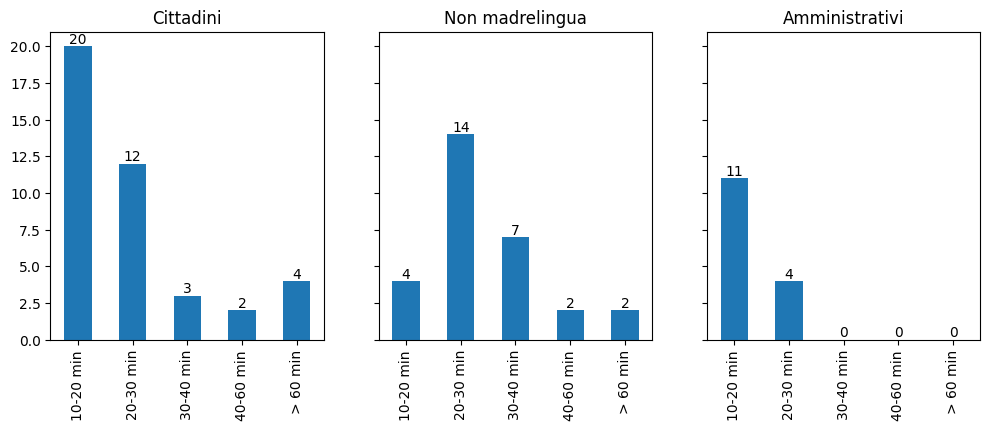

In [8]:
barplot(
  'survey_time',
  survey_time('ALL', data_df)[1]['duration'],
  survey_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1]['duration'],
  survey_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1]['duration'],
  survey_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]['duration']
)

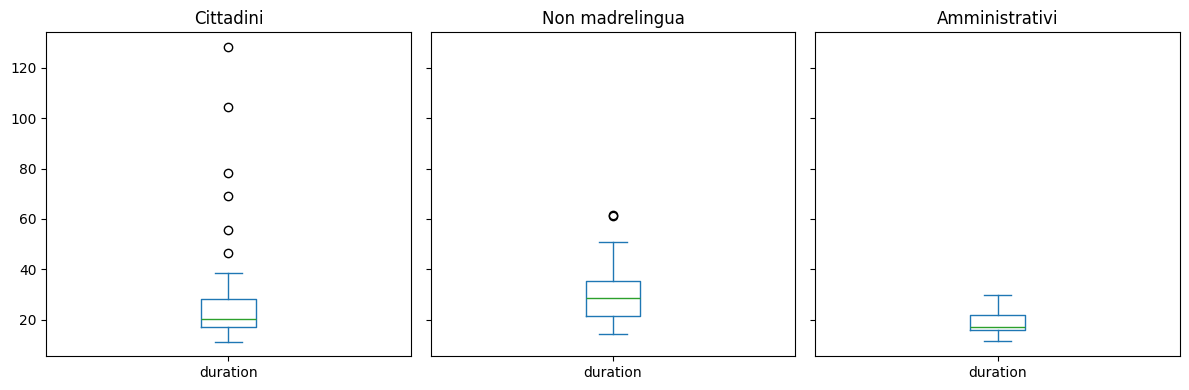

In [9]:
boxplot(
  survey_time('ALL', data_df)[1]['duration'],
  survey_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1]['duration'],
  survey_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1]['duration'],
  survey_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]['duration']
)

# Sessions

In [10]:
def sessions(_n, _p):
  return {
      'name': _n,
      'sessions_mean': _p['sessions'].mean(),
      'sessions_median': _p['sessions'].median(),
  }, {
      'name': _n,
      'sessions': _p['sessions'],
  }

In [11]:
pd.DataFrame([
  sessions('ALL', data_df)[0],
  sessions('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  sessions('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  sessions('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,sessions_mean,sessions_median
0,ALL,1.176471,1.0
1,REGULAR,1.121951,1.0
2,FOREIGNER,1.344828,1.0
3,ADMINISTRATIVE,1.000000,1.0


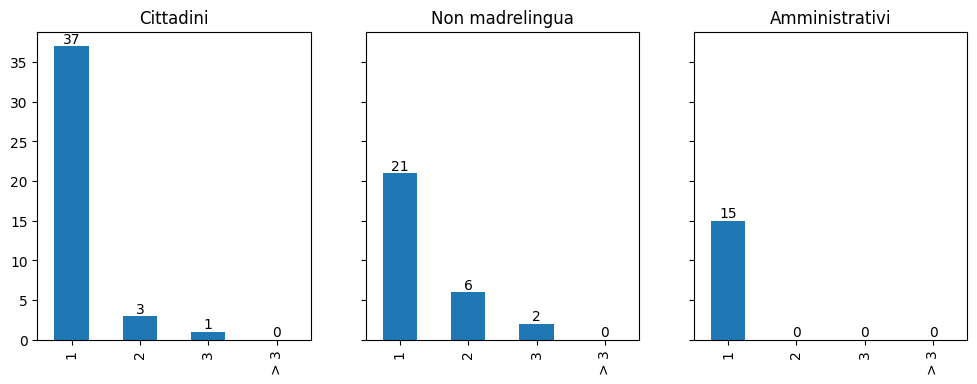

In [12]:
barplot(
  'sessions',
  sessions('ALL', data_df)[1]['sessions'],
  sessions('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1]['sessions'],
  sessions('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1]['sessions'],
  sessions('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]['sessions']
)

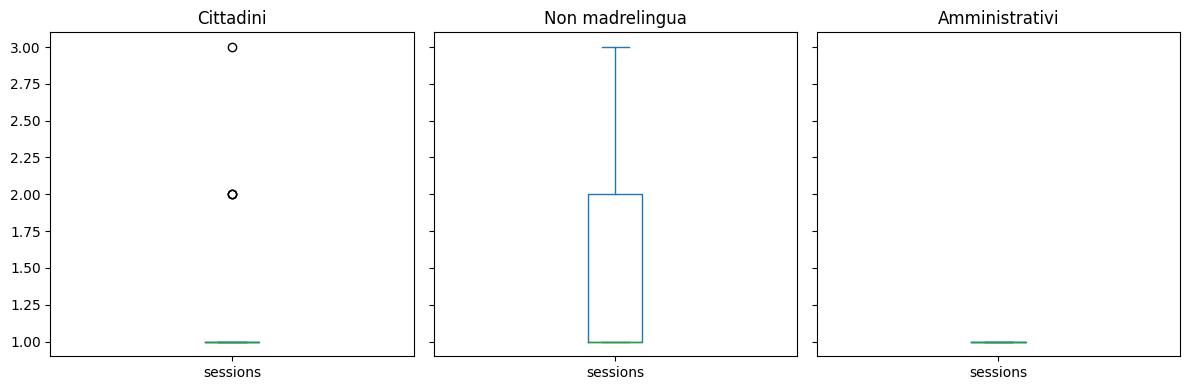

In [13]:
boxplot(
  sessions('ALL', data_df)[1]['sessions'],
  sessions('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1]['sessions'],
  sessions('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1]['sessions'],
  sessions('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]['sessions']
)

# Reading time

In [14]:
def reading_time(_n, _p):
  return {
      'name': _n,
      'd1_mean': _p['d1_reading_time'].mean() / 60.0,
      'd2_mean': _p['d2_reading_time'].mean() / 60.0,
      ' |': ' |',
      'd1o_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d1_reading_time'].mean() / 60.0,
      'd1s_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d1_reading_time'].mean() / 60.0,
      'd2o_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d2_reading_time'].mean() / 60.0,
      'd2s_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d2_reading_time'].mean() / 60.0,
      '||': '||',
      'd1_median': _p['d1_reading_time'].median() / 60.0,
      'd2_median': _p['d2_reading_time'].median() / 60.0,
      '| ': ' |',
      'd1o_median': _p[_p['participant_group'].isin(['A', 'D'])]['d1_reading_time'].median() / 60.0,
      'd1s_median': _p[_p['participant_group'].isin(['B', 'C'])]['d1_reading_time'].median() / 60.0,
      'd2o_median': _p[_p['participant_group'].isin(['B', 'C'])]['d2_reading_time'].median() / 60.0,
      'd2s_median': _p[_p['participant_group'].isin(['A', 'D'])]['d2_reading_time'].median() / 60.0,
  }, {
      'name': _n,
      'd1o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_reading_time'] / 60.0,
      'd1s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_reading_time'] / 60.0,
      'd2o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_reading_time'] / 60.0,
      'd2s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_reading_time'] / 60.0
  }

In [15]:
pd.DataFrame([
  reading_time('ALL', data_df)[0],
  reading_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  reading_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  reading_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,d1_mean,d2_mean,|,d1o_mean,d1s_mean,d2o_mean,d2s_mean,||,d1_median,d2_median,|,d1o_median,d1s_median,d2o_median,d2s_median
0,ALL,10.233092,7.635502,|,9.656023,10.770816,7.892756,7.359425,||,6.938817,6.253033,|,7.198583,6.864225,6.474500,6.206300
1,REGULAR,11.719492,6.673676,|,10.753322,12.639655,7.581483,5.720480,||,6.789633,6.233767,|,7.003800,6.312617,7.366850,5.720592
2,FOREIGNER,9.459447,10.212892,|,7.857721,10.954391,9.767730,10.689851,||,8.471300,9.101950,|,6.801825,8.968267,9.170183,8.949675
3,ADMINISTRATIVE,7.665980,5.281540,|,10.117486,5.520912,5.194275,5.381271,||,6.490683,4.927483,|,10.819817,6.293783,5.098208,4.132850


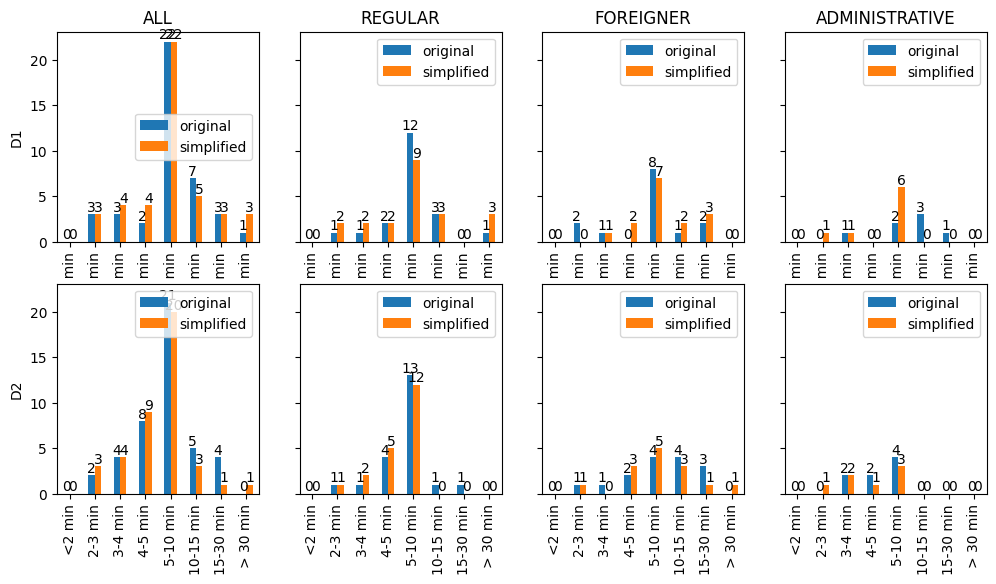

In [16]:
dual_barplot(
  'reading_time',
  reading_time('ALL', data_df)[1],
  reading_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  reading_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  reading_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

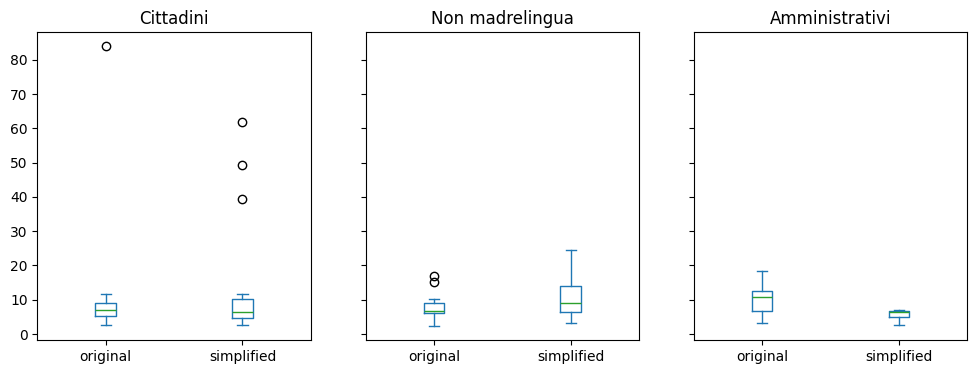

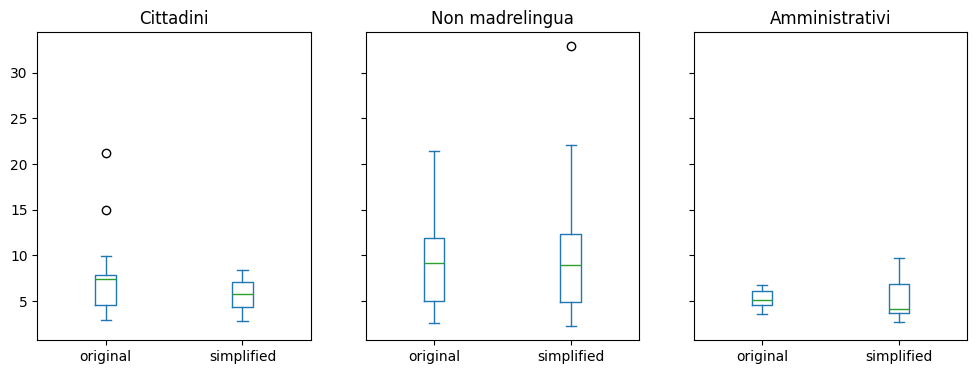

In [17]:
dual_boxplot(
  reading_time('ALL', data_df)[1],
  reading_time('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  reading_time('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  reading_time('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

# Rate (higher is harder)

In [18]:
def rate(_n, _p):
  return {
      'name': _n,
      'd1_mean': _p['d1_rate'].mean(),
      'd2_mean': _p['d2_rate'].mean(),
      ' |': ' |',
      'd1o_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d1_rate'].mean(),
      'd1s_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d1_rate'].mean(),
      'd2o_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d2_rate'].mean(),
      'd2s_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d2_rate'].mean(),
      '||': '||',
      'd1_median': _p['d1_rate'].median(),
      'd2_median': _p['d2_rate'].median(),
      '| ': '| ',
      'd1o_median': _p[_p['participant_group'].isin(['A', 'D'])]['d1_rate'].median(),
      'd1s_median': _p[_p['participant_group'].isin(['B', 'C'])]['d1_rate'].median(),
      'd2o_median': _p[_p['participant_group'].isin(['B', 'C'])]['d2_rate'].median(),
      'd2s_median': _p[_p['participant_group'].isin(['A', 'D'])]['d2_rate'].median(),
  }, {
      'name': _n,
      'd1o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_rate'],
      'd1s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_rate'],
      'd2o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_rate'],
      'd2s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_rate']
  }

In [19]:
pd.DataFrame([
  rate('ALL', data_df)[0],
  rate('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  rate('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  rate('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,d1_mean,d2_mean,|,d1o_mean,d1s_mean,d2o_mean,d2s_mean,||,d1_median,d2_median,|,d1o_median,d1s_median,d2o_median,d2s_median
0,ALL,3.376471,3.352941,|,3.439024,3.318182,3.568182,3.121951,||,3.0,3.0,|,3.0,3.0,3.0,3.0
1,REGULAR,3.170732,2.853659,|,3.300000,3.047619,3.000000,2.700000,||,3.0,3.0,|,3.5,3.0,3.0,3.0
2,FOREIGNER,3.827586,4.103448,|,3.714286,3.933333,4.466667,3.714286,||,4.0,4.0,|,4.0,4.0,5.0,4.0
3,ADMINISTRATIVE,3.066667,3.266667,|,3.285714,2.875000,3.375000,3.142857,||,3.0,3.0,|,3.0,3.0,3.0,3.0


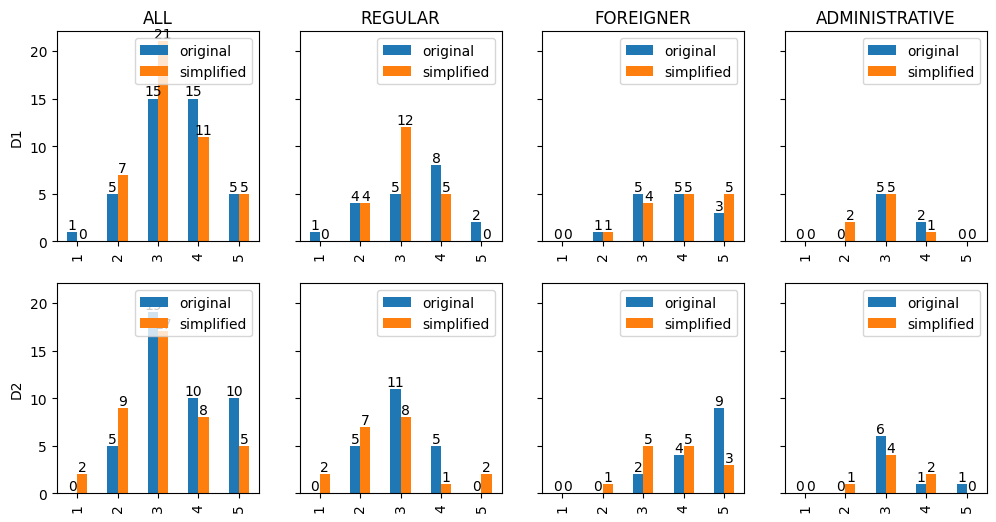

In [20]:
dual_barplot(
  'rate',
  rate('ALL', data_df)[1],
  rate('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  rate('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  rate('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

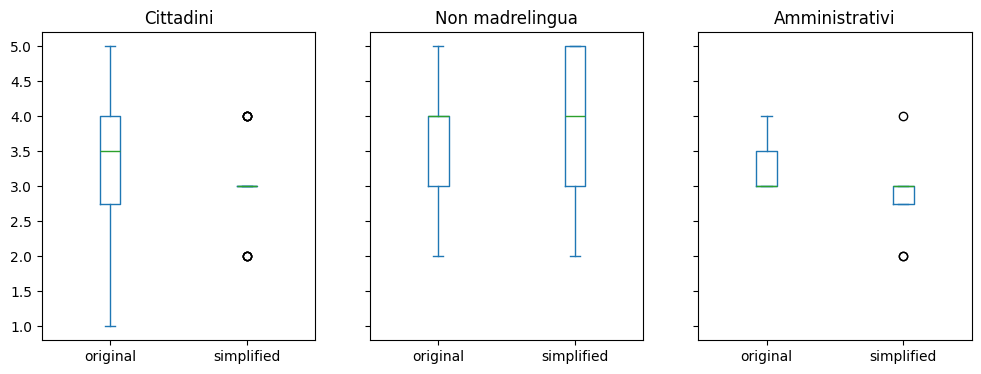

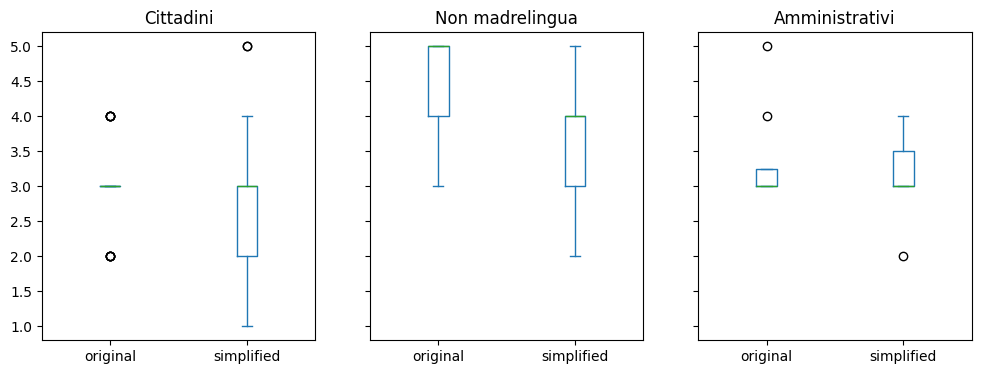

In [21]:
dual_boxplot(
  rate('ALL', data_df)[1],
  rate('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  rate('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  rate('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

# Correctness

In [22]:
def correctness(_n, _p):
  return {
      'name': _n,
      'd1_mean': _p['d1_correctness'].mean(),
      'd2_mean': _p['d2_correctness'].mean(),
      ' |': ' |',
      'd1o_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d1_correctness'].mean(),
      'd1s_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d1_correctness'].mean(),
      'd2o_mean': _p[_p['participant_group'].isin(['B', 'C'])]['d2_correctness'].mean(),
      'd2s_mean': _p[_p['participant_group'].isin(['A', 'D'])]['d2_correctness'].mean(),
      '||': '||',
      'd1_median': _p['d1_correctness'].median(),
      'd2_median': _p['d2_correctness'].median(),
      '| ': '| ',
      'd1o_median': _p[_p['participant_group'].isin(['A', 'D'])]['d1_correctness'].median(),
      'd1s_median': _p[_p['participant_group'].isin(['B', 'C'])]['d1_correctness'].median(),
      'd2o_median': _p[_p['participant_group'].isin(['B', 'C'])]['d2_correctness'].median(),
      'd2s_median': _p[_p['participant_group'].isin(['A', 'D'])]['d2_correctness'].median(),
  }, {
      'name': _n,
      'd1o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_correctness'],
      'd1s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_correctness'],
      'd2o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_correctness'],
      'd2s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_correctness']
  }

In [23]:
pd.DataFrame([
  correctness('ALL', data_df)[0],
  correctness('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  correctness('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  correctness('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,d1_mean,d2_mean,|,d1o_mean,d1s_mean,d2o_mean,d2s_mean,||,d1_median,d2_median,|,d1o_median,d1s_median,d2o_median,d2s_median
0,ALL,3.729412,3.988235,|,3.780488,3.681818,3.977273,4.000000,||,4.0,4.0,|,4.0,4.0,4.0,4.0
1,REGULAR,3.975610,4.195122,|,3.850000,4.095238,4.333333,4.050000,||,4.0,4.0,|,4.0,4.0,5.0,4.0
2,FOREIGNER,3.103448,3.517241,|,3.357143,2.866667,3.400000,3.642857,||,3.0,4.0,|,4.0,3.0,3.0,4.0
3,ADMINISTRATIVE,4.266667,4.333333,|,4.428571,4.125000,4.125000,4.571429,||,4.0,4.0,|,5.0,4.0,4.0,5.0


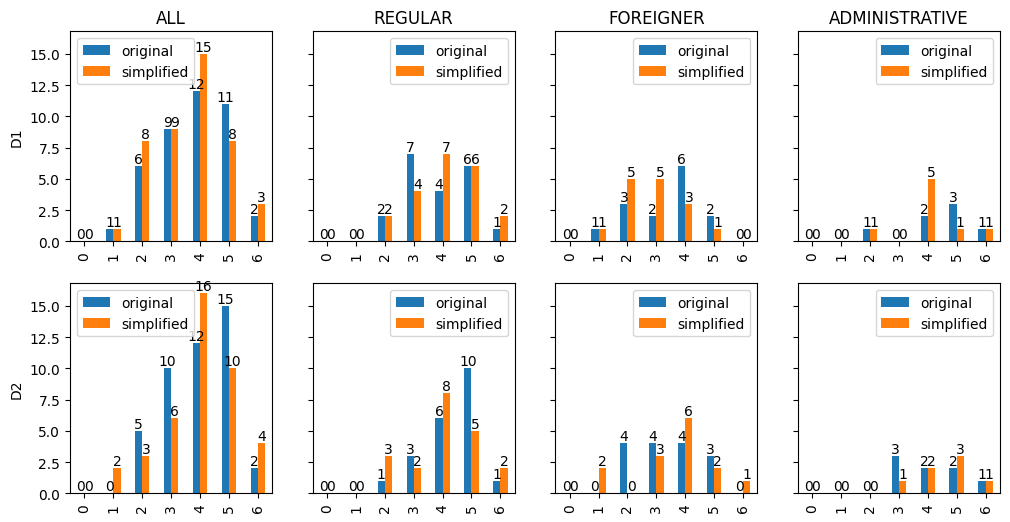

In [24]:
dual_barplot(
  'correctness',
  correctness('ALL', data_df)[1],
  correctness('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  correctness('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  correctness('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

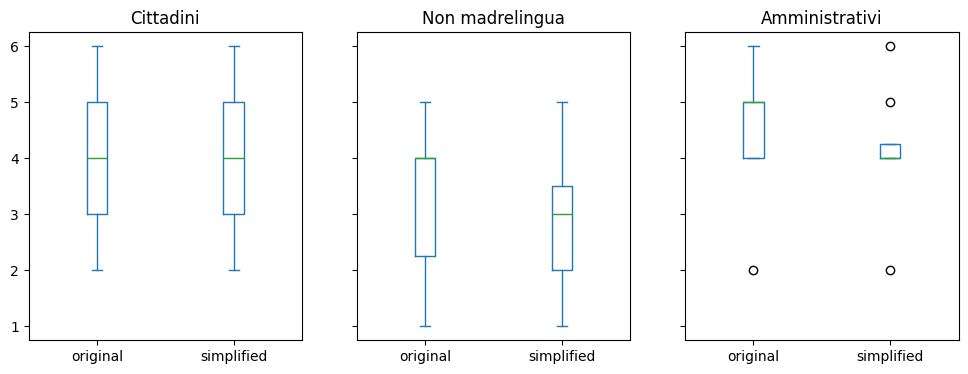

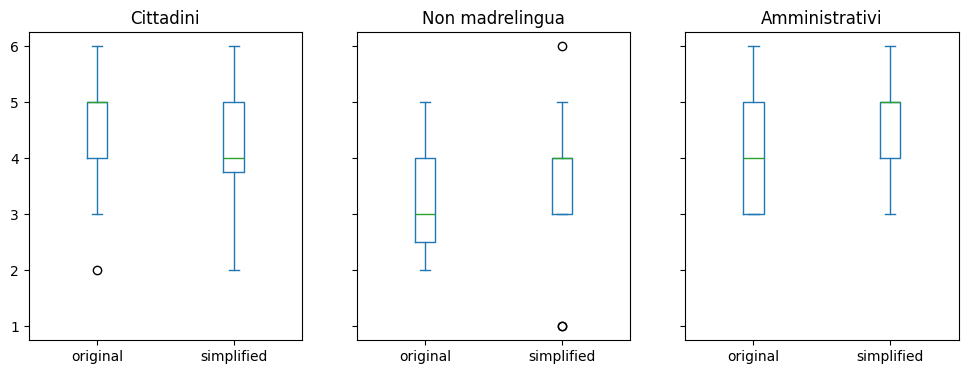

In [25]:
dual_boxplot(
  correctness('ALL', data_df)[1],
  correctness('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  correctness('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  correctness('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

# Insecurity

In [26]:
def insecurity(_n, _p):
  return {
      'name': _n,
      'd1_mean': (_p['d1_insecurity_count'] / 6).mean() * 100,
      'd2_mean': (_p['d2_insecurity_count'] / 6).mean() * 100,
      ' |': ' |',
      'd1o_mean': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_insecurity_count'].mean() / 6).mean() * 100,
      'd1s_mean': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_insecurity_count'].mean() / 6).mean() * 100,
      'd2o_mean': (_p[_p['participant_group'].isin(['B', 'C'])]['d2_insecurity_count'].mean() / 6).mean() * 100,
      'd2s_mean': (_p[_p['participant_group'].isin(['A', 'D'])]['d2_insecurity_count'].mean() / 6).mean() * 100,
      '||': '||',
      'd1_median': (_p['d1_insecurity_count'] / 6).median() * 100,
      'd2_median': (_p['d2_insecurity_count'] / 6).median() * 100,
      '| ': '| ',
      'd1o_median': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_insecurity_count'] / 6).median() * 100,
      'd1s_median': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_insecurity_count'] / 6).median() * 100,
      'd2o_median': (_p[_p['participant_group'].isin(['B', 'C'])]['d2_insecurity_count'] / 6).median() * 100,
      'd2s_median': (_p[_p['participant_group'].isin(['A', 'D'])]['d2_insecurity_count'] / 6).median() * 100,
  }, {
      'name': _n,
      'd1o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_insecurity_count'],
      'd1s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_insecurity_count'],
      'd2o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_insecurity_count'],
      'd2s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_insecurity_count']
  }

In [27]:
pd.DataFrame([
  insecurity('ALL', data_df)[0],
  insecurity('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[0],
  insecurity('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[0],
  insecurity('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[0],
]).head(5)

,name,d1_mean,d2_mean,|,d1o_mean,d1s_mean,d2o_mean,d2s_mean,||,d1_median,d2_median,|,d1o_median,d1s_median,d2o_median,d2s_median
0,ALL,4.509804,2.549020,|,4.471545,4.545455,1.136364,4.065041,||,0.0,0.0,|,0.0,0.0,0.0,0.0
1,REGULAR,3.658537,2.845528,|,4.166667,3.174603,1.587302,4.166667,||,0.0,0.0,|,0.0,0.0,0.0,0.0
2,FOREIGNER,7.471264,2.873563,|,7.142857,7.777778,1.111111,4.761905,||,0.0,0.0,|,0.0,0.0,0.0,0.0
3,ADMINISTRATIVE,1.111111,1.111111,|,0.000000,2.083333,0.000000,2.380952,||,0.0,0.0,|,0.0,0.0,0.0,0.0


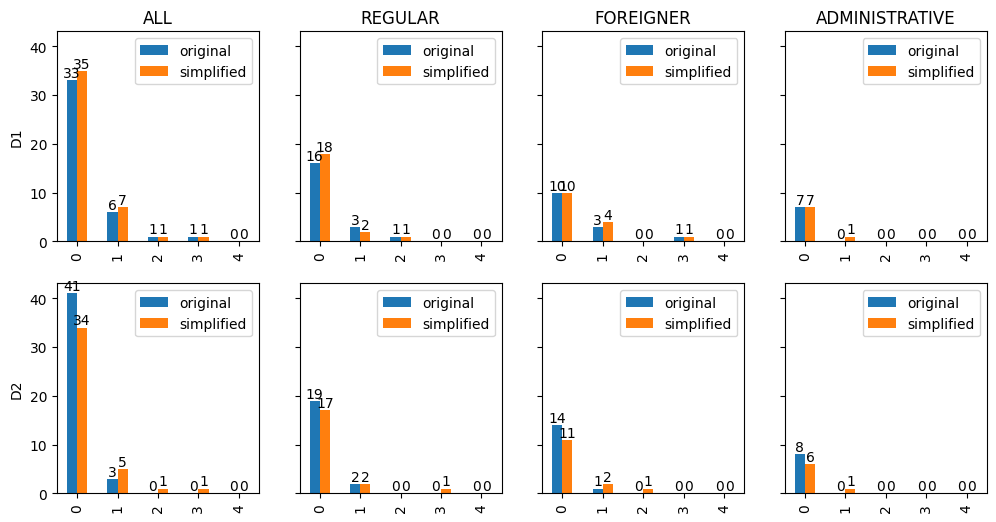

In [28]:
dual_barplot(
  'insecurity',
  insecurity('ALL', data_df)[1],
  insecurity('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  insecurity('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  insecurity('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

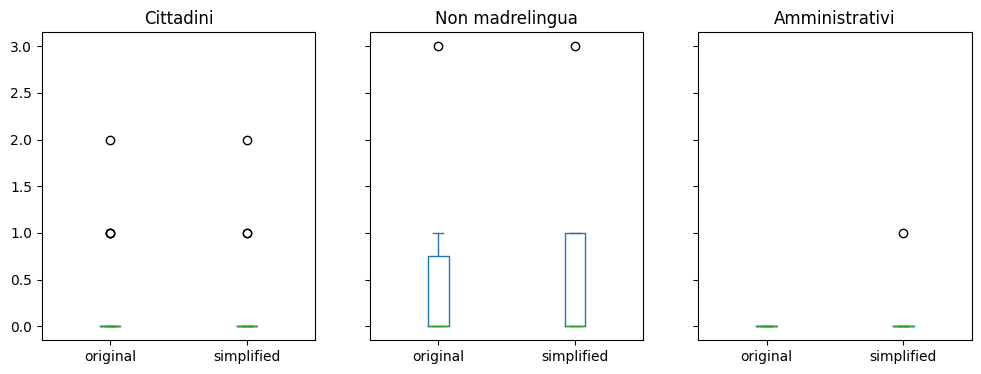

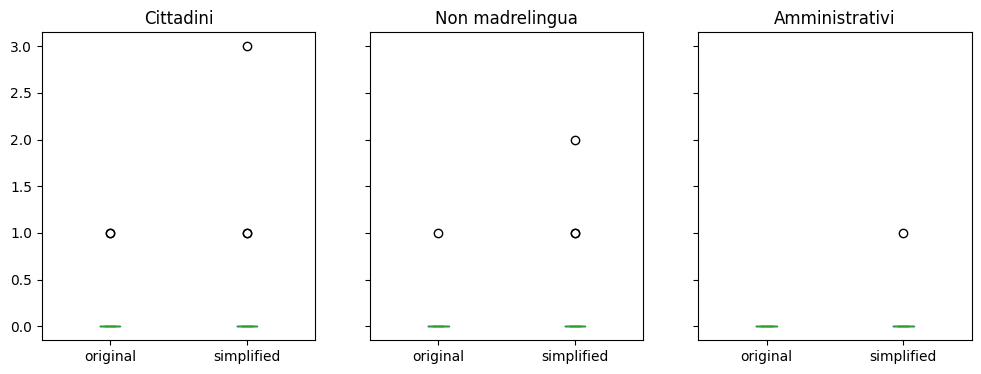

In [29]:
dual_boxplot(
  insecurity('ALL', data_df)[1],
  insecurity('REGULAR', data_df[data_df['participant_type'] == 'REGULAR'])[1],
  insecurity('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER'])[1],
  insecurity('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE'])[1]
)

# Questions

In [30]:
def question_d1(_q, _n, _p):
  original_total = _p[_p['participant_group'].isin(['A', 'D'])].shape[0]
  simplified_total = _p[_p['participant_group'].isin(['B', 'C'])].shape[0]
  return {
      'name': _n,
      'o_correct': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_' + _q] == 1).sum(),
      'o_correct (%)': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_' + _q] == 1).sum() / original_total * 100,
      's_correct': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_' + _q] == 1).sum(),
      's_correct (%)': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_' + _q] == 1).sum() / simplified_total * 100,
      '||': '||',
      'o_insecurity': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_' + _q] == 5).sum(),
      'o_insecurity (%)': (_p[_p['participant_group'].isin(['A', 'D'])]['d1_' + _q] == 5).sum() / original_total * 100,
      's_insecurity': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_' + _q] == 5).sum(),
      's_insecurity (%)': (_p[_p['participant_group'].isin(['B', 'C'])]['d1_' + _q] == 5).sum() / simplified_total * 100,
  }


def question_d1_for_plot(_n, _p):
  return {
    'q1_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q1'],
    'q1_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q1'],
    'q2_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q2'],
    'q2_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q2'],
    'q3_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q3'],
    'q3_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q3'],
    'q4_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q4'],
    'q4_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q4'],
    'q5_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q5'],
    'q5_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q5'],
    'q6_o': _p[_p['participant_group'].isin(['A', 'D'])]['d1_q6'],
    'q6_s': _p[_p['participant_group'].isin(['B', 'C'])]['d1_q6'],
  }


def question_d2(_q, _n, _p):
  original_total = _p[_p['participant_group'].isin(['B', 'C'])].shape[0]
  simplified_total = _p[_p['participant_group'].isin(['A', 'D'])].shape[0]
  return {
      'name': _n,
      'o_correct':          (_p[_p['participant_group'].isin(['B', 'C'])]['d2_' + _q] == 1).sum(),
      'o_correct (%)':      (_p[_p['participant_group'].isin(['B', 'C'])]['d2_' + _q] == 1).sum() / original_total * 100,
      's_correct':          (_p[_p['participant_group'].isin(['A', 'D'])]['d2_' + _q] == 1).sum(),
      's_correct (%)':      (_p[_p['participant_group'].isin(['A', 'D'])]['d2_' + _q] == 1).sum() / simplified_total * 100,
      '||': '||',
      'o_insecurity':       (_p[_p['participant_group'].isin(['B', 'C'])]['d2_' + _q] == 5).sum(),
      'o_insecurity (%)':   (_p[_p['participant_group'].isin(['B', 'C'])]['d2_' + _q] == 5).sum() / original_total * 100,
      's_insecurity':       (_p[_p['participant_group'].isin(['A', 'D'])]['d2_' + _q] == 5).sum(),
      's_insecurity (%)':   (_p[_p['participant_group'].isin(['A', 'D'])]['d2_' + _q] == 5).sum() / simplified_total * 100,
  }

def question_d2_for_plot(_n, _p):
  return {
    'q1_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q1'],
    'q1_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q1'],
    'q2_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q2'],
    'q2_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q2'],
    'q3_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q3'],
    'q3_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q3'],
    'q4_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q4'],
    'q4_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q4'],
    'q5_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q5'],
    'q5_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q5'],
    'q6_o': _p[_p['participant_group'].isin(['B', 'C'])]['d2_q6'],
    'q6_s': _p[_p['participant_group'].isin(['A', 'D'])]['d2_q6'],
  }

## D1

In [31]:
for q in ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']:
  print(q)
  display(pd.DataFrame([
      question_d1(q, 'ALL', data_df),
      question_d1(q, 'REGULAR', data_df[data_df['participant_type'] == 'REGULAR']),
      question_d1(q, 'FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER']),
      question_d1(q, 'ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE']),
  ]).head(5))

q1


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,36,87.804878,39,88.636364,||,0,0.0,1,2.272727
1,REGULAR,17,85.000000,21,100.000000,||,0,0.0,0,0.000000
2,FOREIGNER,12,85.714286,10,66.666667,||,0,0.0,1,6.666667
3,ADMINISTRATIVE,7,100.000000,8,100.000000,||,0,0.0,0,0.000000


q2


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,7,17.073171,8,18.181818,||,2,4.878049,2,4.545455
1,REGULAR,3,15.000000,4,19.047619,||,2,10.000000,1,4.761905
2,FOREIGNER,2,14.285714,1,6.666667,||,0,0.000000,1,6.666667
3,ADMINISTRATIVE,2,28.571429,3,37.500000,||,0,0.000000,0,0.000000


q3


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,22,53.658537,22,50.000000,||,2,4.878049,0,0.0
1,REGULAR,10,50.000000,13,61.904762,||,0,0.000000,0,0.0
2,FOREIGNER,8,57.142857,6,40.000000,||,2,14.285714,0,0.0
3,ADMINISTRATIVE,4,57.142857,3,37.500000,||,0,0.000000,0,0.0


q4


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,31,75.609756,23,52.272727,||,1,2.439024,5,11.363636
1,REGULAR,16,80.000000,11,52.380952,||,0,0.000000,2,9.523810
2,FOREIGNER,9,64.285714,6,40.000000,||,1,7.142857,3,20.000000
3,ADMINISTRATIVE,6,85.714286,6,75.000000,||,0,0.000000,0,0.000000


q5


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,24,58.536585,33,75.000000,||,5,12.195122,0,0.0
1,REGULAR,13,65.000000,18,85.714286,||,2,10.000000,0,0.0
2,FOREIGNER,5,35.714286,9,60.000000,||,3,21.428571,0,0.0
3,ADMINISTRATIVE,6,85.714286,6,75.000000,||,0,0.000000,0,0.0


q6


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,35,85.365854,37,84.090909,||,1,2.439024,4,9.090909
1,REGULAR,18,90.000000,19,90.476190,||,1,5.000000,1,4.761905
2,FOREIGNER,11,78.571429,11,73.333333,||,0,0.000000,2,13.333333
3,ADMINISTRATIVE,6,85.714286,7,87.500000,||,0,0.000000,1,12.500000


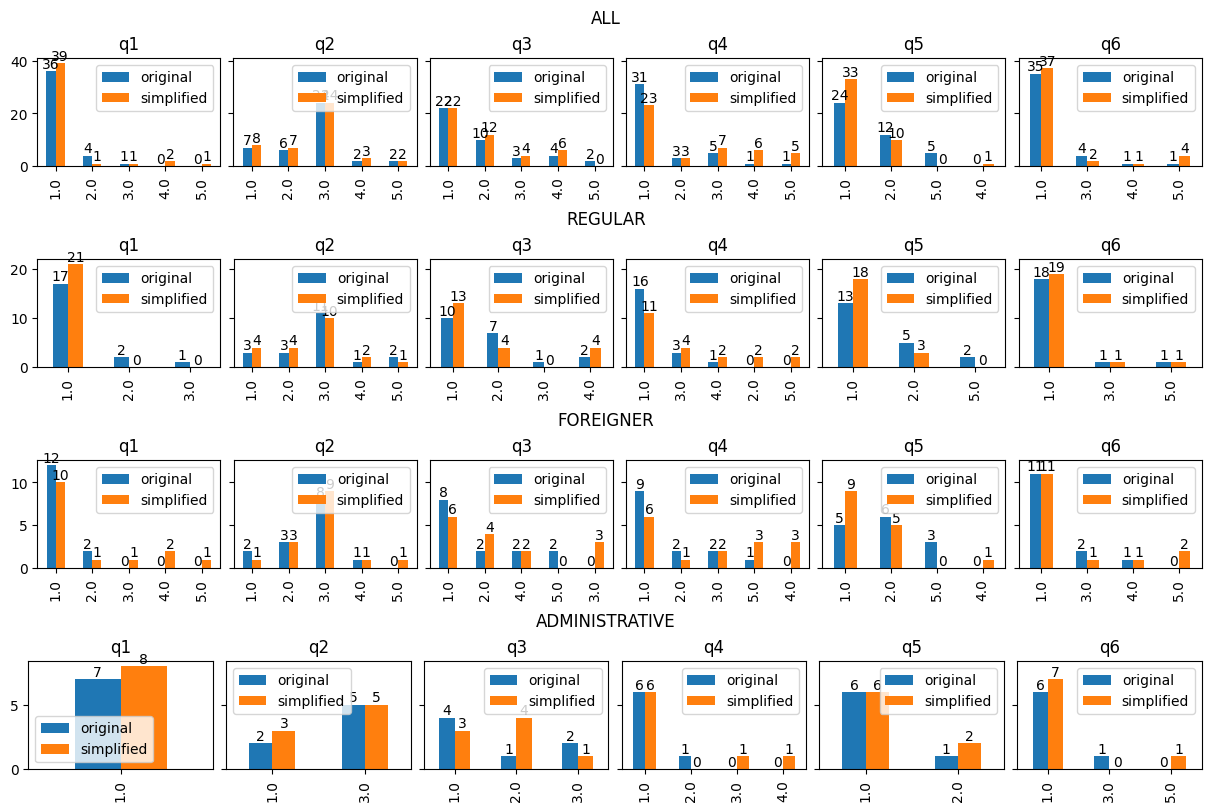

In [32]:
questions_barplot(
  question_d1_for_plot('ALL', data_df),
  question_d1_for_plot('REGULAR', data_df[data_df['participant_type'] == 'REGULAR']),
  question_d1_for_plot('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER']),
  question_d1_for_plot('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE']),
)

## D2

In [33]:
for q in ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']:
  print(q)
  display(pd.DataFrame([
      question_d2(q, 'ALL', data_df),
      question_d2(q, 'REGULAR', data_df[data_df['participant_type'] == 'REGULAR']),
      question_d2(q, 'FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER']),
      question_d2(q, 'ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE']),
  ]).head(5))

q1


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,40,90.909091,38,92.682927,||,0,0.0,1,2.439024
1,REGULAR,21,100.000000,18,90.000000,||,0,0.0,1,5.000000
2,FOREIGNER,12,80.000000,13,92.857143,||,0,0.0,0,0.000000
3,ADMINISTRATIVE,7,87.500000,7,100.000000,||,0,0.0,0,0.000000


q2


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,22,50.000000,25,60.975610,||,0,0.0,3,7.317073
1,REGULAR,12,57.142857,12,60.000000,||,0,0.0,2,10.000000
2,FOREIGNER,5,33.333333,6,42.857143,||,0,0.0,1,7.142857
3,ADMINISTRATIVE,5,62.500000,7,100.000000,||,0,0.0,0,0.000000


q3


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,27,61.363636,28,68.292683,||,0,0.0,1,2.439024
1,REGULAR,16,76.190476,16,80.000000,||,0,0.0,0,0.000000
2,FOREIGNER,7,46.666667,7,50.000000,||,0,0.0,1,7.142857
3,ADMINISTRATIVE,4,50.000000,5,71.428571,||,0,0.0,0,0.000000


q4


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,11,25.000000,11,26.829268,||,2,4.545455,2,4.878049
1,REGULAR,6,28.571429,4,20.000000,||,1,4.761905,1,5.000000
2,FOREIGNER,3,20.000000,5,35.714286,||,1,6.666667,1,7.142857
3,ADMINISTRATIVE,2,25.000000,2,28.571429,||,0,0.000000,0,0.000000


q5


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,39,88.636364,35,85.365854,||,1,2.272727,1,2.439024
1,REGULAR,18,85.714286,16,80.000000,||,1,4.761905,1,5.000000
2,FOREIGNER,13,86.666667,12,85.714286,||,0,0.000000,0,0.000000
3,ADMINISTRATIVE,8,100.000000,7,100.000000,||,0,0.000000,0,0.000000


q6


,name,o_correct,o_correct (%),s_correct,s_correct (%),||,o_insecurity,o_insecurity (%),s_insecurity,s_insecurity (%)
0,ALL,36,81.818182,27,65.853659,||,0,0.0,2,4.878049
1,REGULAR,18,85.714286,15,75.000000,||,0,0.0,0,0.000000
2,FOREIGNER,11,73.333333,8,57.142857,||,0,0.0,1,7.142857
3,ADMINISTRATIVE,7,87.500000,4,57.142857,||,0,0.0,1,14.285714


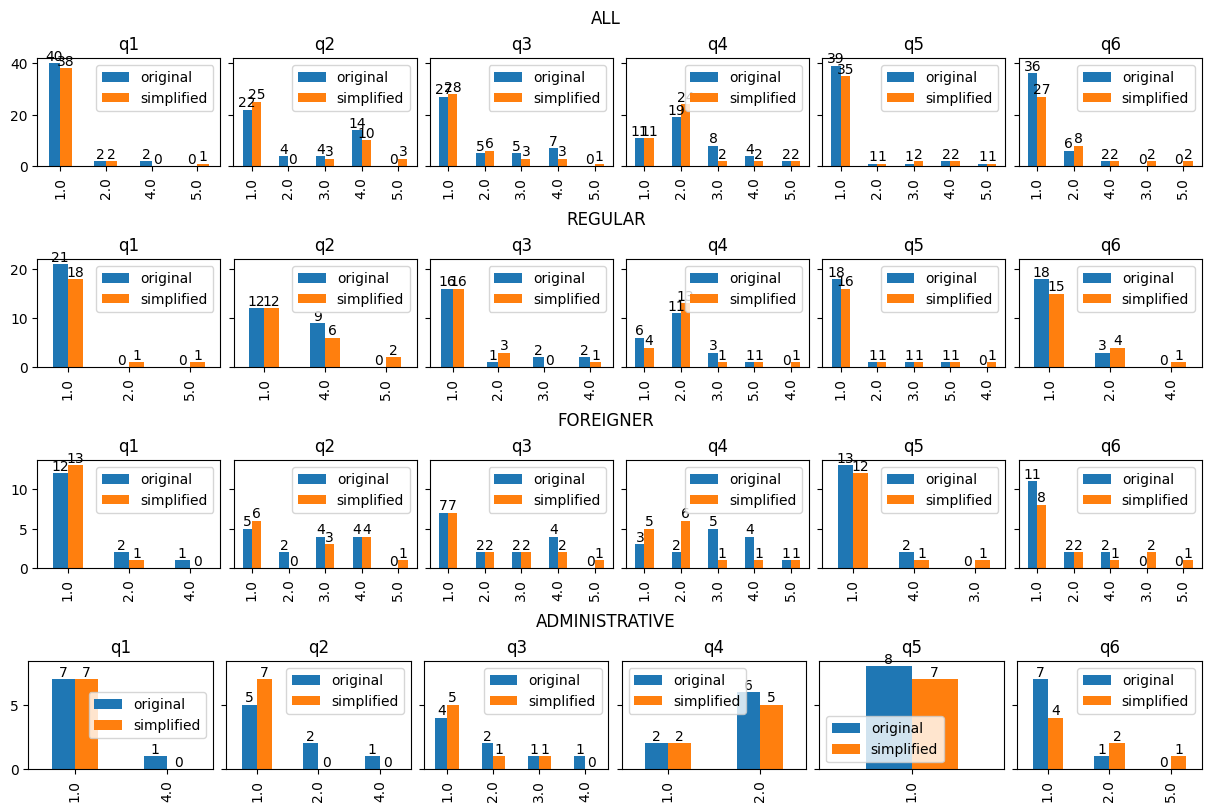

In [34]:
questions_barplot(
  question_d2_for_plot('ALL', data_df),
  question_d2_for_plot('REGULAR', data_df[data_df['participant_type'] == 'REGULAR']),
  question_d2_for_plot('FOREIGNER', data_df[data_df['participant_type'] == 'FOREIGNER']),
  question_d2_for_plot('ADMINISTRATIVE', data_df[data_df['participant_type'] == 'ADMINISTRATIVE']),
)

# Questions (text)





## D1

Q1: Il provvedimento vuole garantire la qualità dell'assistenza sanitaria. La qualità dell'assistenza deve essere *centrata, equa, efficace*.
*Centrata* significa che:
1. la cura è volta alla persona e mira a soddisfare i bisogni, i valori e le preferenze dell'individuo
2. la cura è al centro delle attività dell'amministrazione sanitaria che le amministra ai cittadini
3. la cura è centrata nel senso che rispecchia misure standard, adottate su scala socio-economica
4. la cura costituisce il centro delle esigenze di bilancio dell'amministrazione sanitaria che non deve andare in deficit
5. Non so rispondere


Q2: Qual è il senso generale del documento?
1. Indicare ai cittadini quali sono gli obiettivi preferiti dalla Regione Basilicata in materia di sanità
2. Indicare ai cittadini il nuovo Decreto Ministeriale del 23 maggio 2022, n. 77 per farlo conoscere
3. Indicare alla Regione Basilicata linee guida per programmare i suoi interventi sanitari in modo efficace
4. Elencare tutti i servizi sanitari offerti dalla Regione Basilicata con i fondi PNRR
5. Non so rispondere

Q3: Sei un cittadino che ha bisogno di servizi sanitari, per te ricevere una cura *efficace* vuol dire che:
1. la cura fornisce servizi basati sull'evidenza a chi ne ha bisogno
2. la cura ha effetti di grande efficacia su chi ne ha bisogno
3. la cura raggiunge il risultato voluto dall'amministrazione sanitaria
4. la cura ha l'effetto di determinare economie di scala e risparmi di spesa nell'esecuzione della prestazione sanitaria
5. Non so rispondere

Q4: Il provvedimento vuole realizzare l'integrazione sociosanitaria. L'integrazione della componente sanitaria con la componente sociale significa che:
1. la programmazione regionale garantisce un'integrazione delle prestazioni tale che il cittadino riceve le prestazioni opportune senza che esso venga rinviato a competenze di altri enti e livelli istituzionali
2. la prestazione è integrata a mezzo di sinergie tra pubblico e privato, ciascuno contribuisce secondo una proporzione definita per legge
3. la programmazione è integrata da prestazioni erogate da soggetti sanitari che, pur se dislocati in punti diversi del territorio, sono reperibili nell'ambito della Regione Basilicata
4. la programmazione regionale garantisce prestazioni non differenziate in modo che nessun cittadino si senta escluso
5. Non so rispondere

Q5: Per realizzare la coerenza tra Piano delle Attività Territoriali (PAT) e Piano di Zona (PdZ)
1. occorre che l'ASL e l'ambito sociale utilizzino l'accordo di programma
2. occorre varare insieme i due piani in modo armonico
3. occorre far approvare tutto dalla Regione Basilicata nei suoi diversi organi
4. occorre far approvare tutto dal Ministero preposto cioè quello della Salute
5. Non so rispondere

Q6: Il Piano Sociale di riferimento per l'integrazione è:
1. 2021-2023
2. 2020
3. 2022-2025
4. Quello dell'anno in corso
5. Non so rispondere

## D2

Q1: Tra i servizi forniti dalla ditta interessata a partecipare alla gara c'è:
1. la raccolta specifica di alcune categorie di rifiuti urbani come apparecchiature elettriche ed elettroniche usate, oggetti ingombranti, ecc.; tali rifiuti saranno trasportati a impianti autorizzati
2. la raccolta specifica di alcune categorie di rifiuti urbani come apparecchiature elettriche ed elettroniche usate, oggetti ingombranti, ecc.; tali rifiuti saranno trasportati in altra regione
3. la raccolta dei rifiuti porta a porta
4. la raccolta differenziata solo per i cittadini
5. Non so rispondere

Q2:Immagina di essere la società che partecipa alla gara a nome anche di altre società, rispetto alle garanzie di assicurazione o di fideiussione come devi regolarti?
1. tu devi presentare garanzie di fideiussione e assicurative anche a copertura degli altri partecipanti
2. solo tu, limitatamente alla tua responsabilità, devi presentare garanzie di fideiussione e assicurative
3. ogni società può scegliere come regolarsi per le garanzie di fideiussione e assicurative
4. sia tu sia ciascuna società del tuo gruppo dovete presentare garanzie di fideiussione e assicurative
5. Non so rispondere

Q3: Sei l'amministrazione che deve selezionare il vincitore con l'atto di aggiudicazione. In caso di parità di punteggio tra due offerte quale criterio applicherai?
1. Sceglierò la migliore offerta tecnica e in subordine la domanda presentata prima
2. Sceglierò la domanda arrivata prima e in subordine che propone la migliore offerta tecnica,
3. Sceglierò la migliore offerta economica, per il prezzo più basso, così da far risparmiare la pubblica amministrazione
4. Sceglierò la migliore offerta tecnica così da avere un lavoro ben fatto per la pubblica amministrazione
5. Non so rispondere

Q4: Se ti aggiudichi la gara, rispetto agli strumenti forniti dal Comune (camion, cassonetti, etc.) cosa dovrai fare?
1. Devo stipulare sia un contratto di comodato d'uso sia un contratto di usufrutto
2. Devo stipulare un contratto di comodato d'uso,
3. Devo stipulare un contratto di usufrutto,
4. Non occorre stipulare contratti, basta che io paghi tutte le spese, straordinarie e ordinarie e la manutenzione
5. Non so rispondere

Q5: L'art. di legge che regola la presentazione da parte dell'aggiudicatario di una garanzia definitiva è il n.:
1. 103 del D.Lgsl. 50/2016,
2. 103 del D.Lgsl. 50/2006,
3. 113 del D.Lgsl. 50/2016,
4. Nessun articolo di legge
5. Non so rispondere

Q6: Nel caso in cui qualcuno voglia partecipare alla gara con un'offerta deve essere pronto a offrire quali generi di servizi?
1. Raccolta di rifiuti; lavaggio dei contenitori di strada; distribuzione di sacchetti, bidoni e volantini; trasporto dei rifiuti alle aree di smaltimento
2. Raccolta di rifiuti; distribuzione di sacchetti, bidoni e volantini; trasporto dei rifiuti alle aree di smaltimento
3. Raccolta di rifiuti,
4. Si può scegliere quali servizi offrire tra quelli proposti
5. Non so rispondere